https://github.com/selfedu-rus/machine_learning/blob/main/machine_learning_26.py

In [ ]:
# @title Это код из лекци
# вычисление собственных векторов и собственных чисел

import numpy as np
import matplotlib.pyplot as plt

SIZE = 1000
np.random.seed(123)
x = np.random.normal(size=SIZE)
# x = np.random.normal(size=SIZE, loc=1.0)
y = np.random.normal(size=SIZE)
z = (x + y) / 2

F = np.vstack([x, y, z])
FF = 1 / SIZE * F @ F.T # матрица Грама
# FF = F @ F.T # не нормированная
L, W = np.linalg.eig(FF)
WW = sorted(zip(L, W.T), key=lambda lx: lx[0], reverse=True)
WW = np.array([w[1] for w in WW])

# print(sorted(L, reverse=True))
L, W

(array([0.        , 1.40189302, 0.98418642]),
 array([[ 0.40824829,  0.66187026, -0.62869793],
        [ 0.40824829,  0.4836216 ,  0.77423735],
        [-0.81649658,  0.57274593,  0.07276971]]))

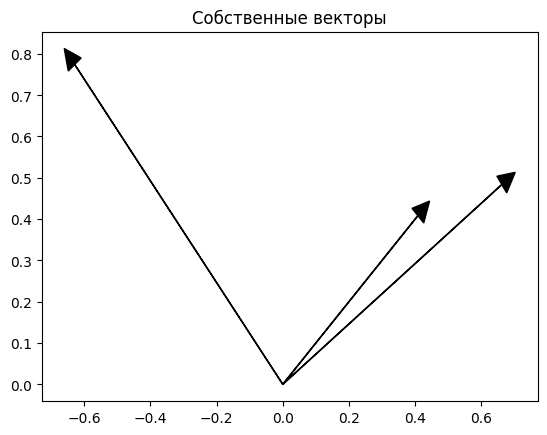

In [ ]:
for i in range(len(L)):
    plt.arrow(0, 0, W[0, i], W[1, i], head_width=0.05, head_length=0.05, fc='k', ec='k')
plt.title('Собственные векторы')
plt.show()

Ковариационная матрица и матрица Грама, отличия:
- **Ковариационная матрица** описывает связи (ковариацию) между признаками (столбцами матрицы $ X $).
- **Матрица Грама** $ G $ описывает связи (скалярные произведения)
между наблюдениями (строками матрицы $ X $).

### **Пример расчёта**
Предположим, у нас есть данные:

$$
X = \begin{pmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{pmatrix}
$$

#### Ковариационная матрица
Сначала делаем центрирование данных (вычитаем среднее значение по каждому признаку):

$$
\mu = \begin{pmatrix} 3 \\ 4 \end{pmatrix}, \quad
X_{\text{centered}} = X - \mu = \begin{pmatrix}
-2 & -2 \\
0 & 0 \\
2 & 2
\end{pmatrix}
$$

Вычисляем ковариационную матрицу:

$$
\Sigma = X_{\text{centered}}^T X_{\text{centered}} = \begin{pmatrix}
-2 & 0 & 2 \\
-2 & 0 & 2
\end{pmatrix}
\begin{pmatrix}
-2 & -2 \\
0 & 0 \\
2 & 2
\end{pmatrix} = \begin{pmatrix}
8 & 8 \\
8 & 8
\end{pmatrix}
$$

#### Матрица Грама
Вычисляем матрицу Грама:

$$
G = X X^T = \begin{pmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{pmatrix}
\begin{pmatrix}
1 & 3 & 5 \\
2 & 4 & 6
\end{pmatrix} = \begin{pmatrix}
5 & 11 & 17 \\
11 & 25 & 39 \\
17 & 39 & 61
\end{pmatrix}
$$

In [ ]:
import numpy as np
from sympy import Matrix

X = np.array([[1, 2],
             [3, 4],
             [5, 6]])

mu = X.mean(axis=0)
Xcentered = X - mu

print('Ковариционная матрица:\n')
display(Matrix(Xcentered.T @ Xcentered))

print('\nМатрица Грама:\n')
display(Matrix(X @ X.T))

Ковариционная матрица:



Matrix([
[8.0, 8.0],
[8.0, 8.0]])


Матрица Грама:



Matrix([
[ 5, 11, 17],
[11, 25, 39],
[17, 39, 61]])